In [17]:
from matplotlib import pyplot as plt
import numpy as np
import dtcwt
import copy 
from pandas import read_csv

In [20]:
dataframe = read_csv('data.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')
#vecs = 10*np.cumsum(np.random.rand(120,1) - 0.5, 0) 
#vecs = dataset
#print vecs
print (dataset[198])
#np.append(dataset,dataset[198])
#dataset[199]=dataset[198]
print len(dataset)

[ 153.99000549]
200


In [21]:
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=6)

In [22]:
def remove_comp(x):
    
    '''
    x: input signal
    '''
    for jj in range(len(x)):
        x[jj] = 0  
        
    return x     
   

def second_layer_forward_recons(x,nlevels,rm):
    
    '''
    x: input signal
    nlevels: decomposition scales
    rm: idx of components to be removed
    
    '''
    ph = np.angle(x)
    x = abs(x)
    if len(x)%2!=0:
        z = np.zeros((1, 1), x.dtype)
        x = np.concatenate((x, z),0)

    transform = dtcwt.Transform1d()
    vecs_t = transform.forward(x, nlevels)
    
    for ii in range(len(rm)):
        remove_comp(vecs_t.highpasses[ii])
    
    vecs_recon = transform.inverse(vecs_t)
    
    for jj in range(len(ph)):
        x[jj] =  np.multiply(vecs_recon[jj],ph[jj])
    
    return x
        


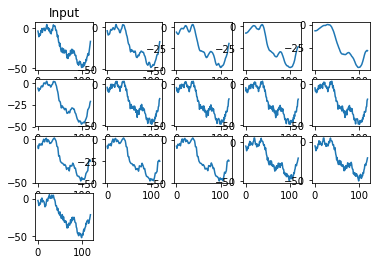

In [23]:

transform = dtcwt.Transform1d()
nlevels = 6
vecs_t = transform.forward(vecs, nlevels)

# Make Copies
vecs_h1 = copy.deepcopy(vecs_t)
vecs_h2 = copy.deepcopy(vecs_t)
vecs_h3 = copy.deepcopy(vecs_t)
vecs_h4 = copy.deepcopy(vecs_t)

X0_0 = second_layer_forward_recons(vecs_h1.highpasses[0],5,[0])
X0_1 = second_layer_forward_recons(vecs_h1.highpasses[0],5,[0,1])
X0_2 = second_layer_forward_recons(vecs_h1.highpasses[0],5,[0,1,2])
X0_3 = second_layer_forward_recons(vecs_h1.highpasses[0],5,[0,1,2,3])

X1_0 = second_layer_forward_recons(vecs_h1.highpasses[1],4,[0])
X1_1 = second_layer_forward_recons(vecs_h1.highpasses[1],4,[0,1])
X1_2 = second_layer_forward_recons(vecs_h1.highpasses[1],4,[0,1,2])

X2_0 = second_layer_forward_recons(vecs_h1.highpasses[2],3,[0])
X2_1 = second_layer_forward_recons(vecs_h1.highpasses[2],3,[0,1])

X3_0 = second_layer_forward_recons(vecs_h1.highpasses[3],2,[0])

# First Layer Reconstruction with removal

for jj in range(len(vecs_h1.highpasses[0])):
    vecs_t.highpasses[0][jj] =  0

vecs_L11 = transform.inverse(vecs_t)  

for jj in range(len(vecs_t.highpasses[1])):
    vecs_t.highpasses[1][jj] =  0

vecs_L12 = transform.inverse(vecs_t)  

for jj in range(len(vecs_t.highpasses[2])):
    vecs_t.highpasses[2][jj] =  0

vecs_L13 = transform.inverse(vecs_t)

for jj in range(len(vecs_t.highpasses[3])):
    vecs_t.highpasses[3][jj] =  0

vecs_L14 = transform.inverse(vecs_t)

for jj in range(len(vecs_h2.highpasses[0])):
    vecs_h2.highpasses[0][jj] =  0
    
for jj in range(len(vecs_h2.highpasses[2])):
    vecs_h2.highpasses[2][jj] =  0

vecs_L15 = transform.inverse(vecs_h2)  

# Second Layer Reconstruction with removal

# reconstruction from x0

for jj in range(len(vecs_h1.highpasses[0])):
    vecs_h1.highpasses[0][jj] =  X0_0[jj]
vecs_L21_0 = transform.inverse(vecs_h1)

for jj in range(len(vecs_h1.highpasses[0])):
    vecs_h1.highpasses[0][jj] =  X0_1[jj]
vecs_L21_1 = transform.inverse(vecs_h1)

for jj in range(len(vecs_h1.highpasses[0])):
    vecs_h1.highpasses[0][jj] =  X0_2[jj]
vecs_L21_2 = transform.inverse(vecs_h1)

for jj in range(len(vecs_h1.highpasses[0])):
    vecs_h1.highpasses[0][jj] =  X0_3[jj]
vecs_L21_3 = transform.inverse(vecs_h1)

# reconstruction from x1


for jj in range(len(vecs_h1.highpasses[1])):
    vecs_h2.highpasses[1][jj] =  X1_0[jj]
vecs_L22_0 = transform.inverse(vecs_h2)   

for jj in range(len(vecs_h1.highpasses[1])):
    vecs_h2.highpasses[1][jj] =  X1_1[jj]
vecs_L22_1 = transform.inverse(vecs_h2)  

for jj in range(len(vecs_h1.highpasses[1])):
    vecs_h2.highpasses[1][jj] =  X1_2[jj]
vecs_L22_2 = transform.inverse(vecs_h2)  


# reconstruction from x2


for jj in range(len(vecs_h1.highpasses[2])):
    vecs_h3.highpasses[2][jj] = X2_0[jj]
vecs_L23_0 = transform.inverse(vecs_h3)   

for jj in range(len(vecs_h1.highpasses[2])):
    vecs_h3.highpasses[2][jj] = X2_1[jj]
vecs_L23_1 = transform.inverse(vecs_h3) 


# reconstruction from x3

for jj in range(len(vecs_h1.highpasses[3])):
    vecs_h4.highpasses[3][jj] = X3_0[jj]
vecs_L24_0 = transform.inverse(vecs_h4)   



# In[9]:

plt.subplot(4, 5, 1)
plt.title('Input')
plt.plot(vecs)

# Show the component removed
plt.subplot(4, 5, 2)
plt.plot(vecs_L11)

plt.subplot(4, 5, 3)
plt.plot(vecs_L12)

plt.subplot(4, 5, 4)
plt.plot(vecs_L13)

plt.subplot(4, 5, 5)
plt.plot(vecs_L14)

plt.subplot(4, 5, 6)
plt.plot(vecs_L15)

plt.subplot(4, 5, 7)
plt.plot(vecs_L21_0)

plt.subplot(4, 5, 8)
plt.plot(vecs_L21_1)

plt.subplot(4, 5, 9)
plt.plot(vecs_L21_2)

plt.subplot(4, 5, 10)
plt.plot(vecs_L21_3)

plt.subplot(4, 5, 11)
plt.plot(vecs_L22_0)

plt.subplot(4, 5, 12)
plt.plot(vecs_L22_1)

plt.subplot(4, 5, 13)
plt.plot(vecs_L22_2)


plt.subplot(4, 5, 14)
plt.plot(vecs_L23_0)

plt.subplot(4, 5, 15)
plt.plot(vecs_L23_1)

plt.subplot(4, 5, 16)
plt.plot(vecs_L24_0)

plt.show()